# Business Understanding

Salah satu bank terkemuka ingin memprediksi nasabah yang terindikasi kredit macet saat mengajukan pinjaman. Pemberi pinjaman biasanya membuat dua jenis keputusan:  

1. pertama, apakah akan memberikan kredit
kepada pemohon baru, dan 
2. kedua, bagaimana menangani pemohon yang sudah ada, termasuk apakah akan meningkatkan batas kredit mereka.

Dalam kedua kasus, apa pun teknik yang digunakan, sangat penting bahwa ada sampel besar pelanggan sebelumnya dengan detail aplikasi, pola perilaku, dan riwayat kredit berikutnya yang tersedia. Sebagian besar teknik menggunakan sampel ini untuk mengidentifikasi hubungan antara karakteristik konsumen (pendapatan tahunan, usia, jumlah tahun bekerja dengan pemberi kerja saat ini, dll.) Dan riwayat mereka selanjutnya. Area aplikasi khas di pasar konsumen meliputi: kartu kredit, pinjaman mobil, hipotek rumah, pinjaman ekuitas rumah, pesanan katalog surat, dan berbagai macam produk pinjaman pribadi.

Objectives 1: Prediktive pengajuan nasabah kartu kredit yang baru akan gagal bayar atau tidak

Judul:
##  Prediktif  analitik untuk Meminimalisir Angka Resiko Nasabah Baru yang Berpotensi Gagal Bayar pada Pengajuan Kartu Kredit Menggunakan Pendekatan Sains Data

Case: Klasifikasi --> Supervised Learning
Kemungkinan Algoritma yang akan dipergunakan:

1. Decision Tree
2. Random Forest
3. Logistic Regression
4. SVM (Support Vector Machine)
5. XGBoost Classifier


Objective 2: Prediktive kenaikan angka kredit pada nasabah yang sudah ada

Judul:
## Implementasi Mechin Learning untuk Prediktive Analitik sebagai Lagkah Optimalisasi Nilai Kredit pada OLD Nasabah Bank XXX.

Case: Estimasi

Kemungkinan algoritma yang dipergunakan:

1. Linier regression
2. ANN (Artificial Neural Network)



In [2]:
# Library

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# import googl edrive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
url = '/content/drive/MyDrive/Colab Notebooks/MSIB/Data Mining/DataSource/credit_risk_1.csv'
load_data_cr = pd.read_csv(url)
load_data_cr.head()

,Unnamed: 0,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,4,24,2,2,0,28,17.3,1.787436,3.056564,1.0


In [5]:
# Membuat Data Frame
# kenapa harus dibikin DF: agar tidak ada proses mondar - mandir dari google colab sehingga tidak memakan banyak resource
# DF dibuat untuk mengekstrak data
df = pd.DataFrame(load_data_cr)
df.head()

,Unnamed: 0,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,4,24,2,2,0,28,17.3,1.787436,3.056564,1.0


## Data Description There are 9 attributes containing 700 customer records followed by:

age: Umur nasabah

ed : Level pendidikan nasabah

employ : Masa jabatan dengan pemberi kerja saat ini (dalam tahun)

address : Jumlah tahun di alamat yang sama

income : Pendapatan nasabah

debtinc : Debt to income ratio (Rasio hutang terhadap pendapatan) Rasio hutang terhadap pendapatan adalah semua pembayaran hutang bulanan Anda dibagi dengan pendapatan kotor bulanan Anda. Angka ini adalah salah satu cara pemberi pinjaman mengukur kemampuan Anda untuk mengelola pembayaran bulanan untuk melunasi uang yang Anda rencanakan untuk dipinjam. Rasio hutang terhadap pendapatan Anda tidak secara langsung mempengaruhi nilai kredit Anda. Ini karena lembaga kredit tidak tahu berapa banyak uang yang Anda peroleh, sehingga mereka tidak dapat melakukan penghitungan

creddebt : Credit to debt ratio (Rasio kredit terhadap utang) Menunjukkan bahwa persentase rasio hutang terhadap kredit yang baik di bawah 30%. Dan itu berlaku untuk rasio Anda pada salah satu kartu Anda secara terpisah serta untuk rasio keseluruhan Anda.

othdebt : utang lainnya

default : Label nasabah gagal di masa lalu (1 = gagal , 0 = tidak pernah gagal)

hutang: sesuatu tanggungan atau kita minjem ke lembaga yang belum lunas

kredit: bakal jadi utang tapi dengan cara kita dapat sesuatu dulu baru itu dihitung hutang

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  700 non-null    int64  
 1   age         700 non-null    int64  
 2   ed          700 non-null    int64  
 3   employ      700 non-null    int64  
 4   address     700 non-null    int64  
 5   income      700 non-null    int64  
 6   debtinc     700 non-null    float64
 7   creddebt    700 non-null    float64
 8   othdebt     700 non-null    float64
 9   default     700 non-null    float64
dtypes: float64(4), int64(6)
memory usage: 54.8 KB


tipe data semua numeric. Tetapi casenya adalah case klasifikasi. Sehingga nanti pada tahap pemodelan data variabel dependen/ variabel target harus berupa bentuk kategorik

Syarat KLASIFIKASI:
1. Variable target/dependen --> Kategorik
2. Input variabel bisa kategorik atau numerik

VARIABEL TARGET/DEPENDEN: default

Input Variable:
1. age         
2. ed            
3. employ        
4. address       
5. income        
6. debtinc     
7. creddebt    
8. othdebt     
9. efault     





In [7]:
# cara mengecek null value
df.isnull().sum()

Unnamed: 0    0
age           0
ed            0
employ        0
address       0
income        0
debtinc       0
creddebt      0
othdebt       0
default       0
dtype: int64

In [8]:
# Melakukan cek values jumlah default berdasarkan gagal atau tidak (1 atau 0)

df['default'].value_counts()

0.0    517
1.0    183
Name: default, dtype: int64

In [9]:
df['ed'].value_counts()

1    372
2    198
3     87
4     38
5      5
Name: ed, dtype: int64

In [10]:
# Membuat list untuk variable input
df = df[['age', 'ed', 'employ', 'address', 'income', 'debtinc', 'creddebt', 'othdebt']]

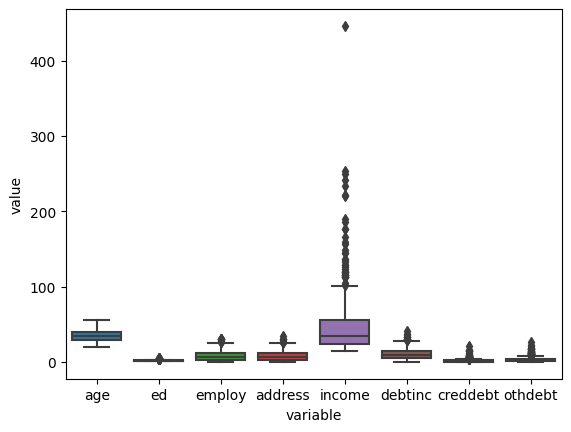

In [11]:
# Menganalisa kondisi data kita, melihat oulier pada data

# Menggunakan Blockpot
sns.boxplot(x='variable', y='value', data=pd.melt(df))
plt.show()

Variable income memiliki nilai yang cenderung tinggi daripada variable lainnya. Karena INCOME itu adalah UANG

In [12]:
# Membuat variabel baru untuk menghapus income sebagai dsta yang memiliki oulier
df_a = df[['age', 'ed', 'employ', 'address', 'debtinc', 'creddebt', 'othdebt']]

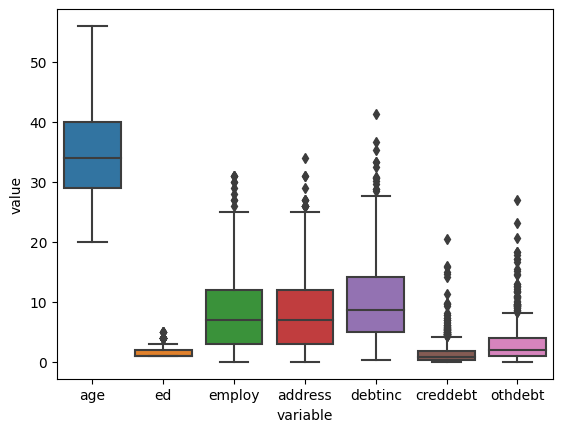

In [13]:
# Menggunakan Blockpot
sns.boxplot(x='variable', y='value', data=pd.melt(df_a))
plt.show()

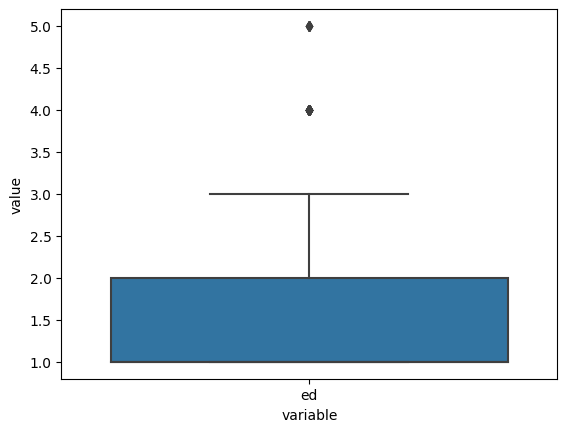

In [14]:
# Membuat variabel baru untuk menghapus income sebagai dsta yang memiliki oulier
df_b = df[['ed']]

sns.boxplot(x='variable', y='value', data=pd.melt(df_b))
plt.show()

1. Calon nasabah kredit didominasi usia diatas
2. Tingkat pendidikan calon nasabah ada 5 SD/SMP/SMA/S1/S2 Dimana tingkat pendidikan 1 dan 2 berada pada area boxplot [sebaranya banyak], Sedangkan KD --> lebih sedikit.
Makin rendah level pendidikan maka makin besar peluang pengajuan kreditnya.
3. Orang mengajukan kredit jika mereka sudah kerja diatas 2 tahun tinggal di tempat yang sama, jabatan yang sama, rasio debit dalam 2 tahun [nilainya sama].
4. Banyak calon naabah lain memiliki utang lainnya

In [15]:
df_data_cr = pd.DataFrame(load_data_cr)

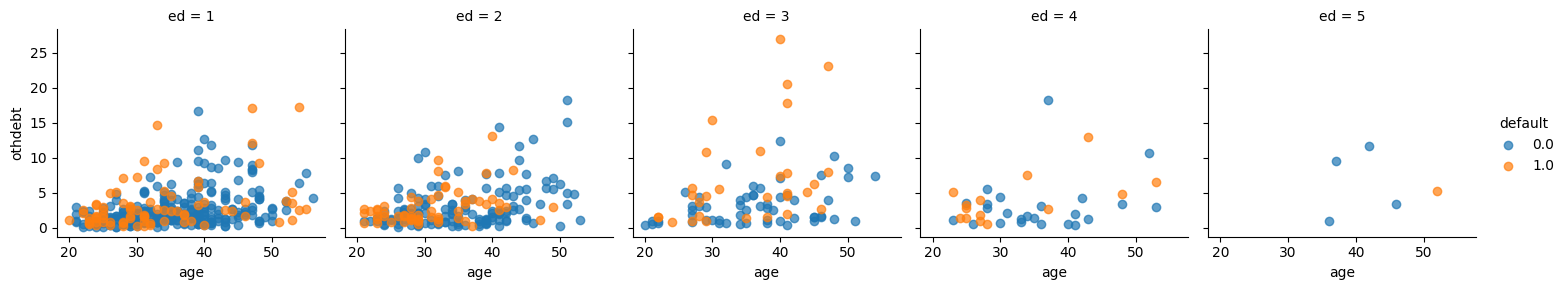

In [16]:
# Menampilkan tingkat pendidikan 
scatplot = sns.FacetGrid(df_data_cr, col='ed', hue='default')
scatplot.map(plt.scatter, 'age', 'othdebt', alpha=0.7)
scatplot.add_legend()

1. Potensi gagal bayar didominasi pada range 20 sd 30 pada level ED 1
2. Potensi gagal bayar didominasi pada range 20 sd 35 pada level ED 2
3. Potensi gagal bayar didominasi pada range 20 sd 45 pada level ED 3
4. Potensi gagal bayar didominasi pada range 20 sd 28 pada level ED 4
5. Potensi gagal bayar didominasi pada range diatas 50 pada level ED 5

## Data Preparation

  NULL value NAN value

In [17]:
df.isnull().sum()

age         0
ed          0
employ      0
address     0
income      0
debtinc     0
creddebt    0
othdebt     0
dtype: int64

In [18]:
df.isna().sum()

age         0
ed          0
employ      0
address     0
income      0
debtinc     0
creddebt    0
othdebt     0
dtype: int64

## Pemodelan Data

In [19]:
# Spliting training dan testing

from sklearn.model_selection import train_test_split # Import train_tes_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [20]:
# Evaluasi Model

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix

In [21]:
df = pd.DataFrame(load_data_cr)
# Input variabel (x)
x = df[['age', 'ed', 'employ', 'address', 'income', 'debtinc', 'creddebt', 'othdebt']]

#Target variabel (y)
y = df['default'].astype('category')

In [22]:
# Split testing and training ------- Supervised Learning

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.3, random_state=0)

Data training sebanyak 70% dan testig sebanyak 30%

Kenapa 70% sama 30% karena melihat dari datanya. Dan distribusi datanya lebih banyak yang tidak gagal daripada gagal

## Pemodelan menggunakan Decision Tree

In [23]:
from sklearn.tree import DecisionTreeClassifier #Import Decision Tree Classifier

In [24]:
# Membuat objek algoritma Decision Tree klasifikasi
tree = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=6)

# Memodelkan data menggunakan algoritma Decision Tree
model_tree = tree.fit(x_train,y_train)

# Melakukan predict pada data test
pred_tree = model_tree.predict(x_test)

gini: kalo kita fokus ke akurasinya <br> spliiter: untuk ngebagusin splitternya
max_depth: kedalaman pohon

## Evaluasi Decision Tree Klasifikasi

In [25]:
print(classification_report(y_test, pred_tree))

              precision    recall  f1-score   support

         0.0       0.83      0.80      0.81       155
         1.0       0.48      0.53      0.50        55

    accuracy                           0.73       210
   macro avg       0.66      0.66      0.66       210
weighted avg       0.74      0.73      0.73       210



model diatas mengalami overfitting karena pecision tinggi dan accuracy rendah. sehingga model **tidak bisa digunakan**.

Text(113.9222222222222, 0.5, 'predicted  label')

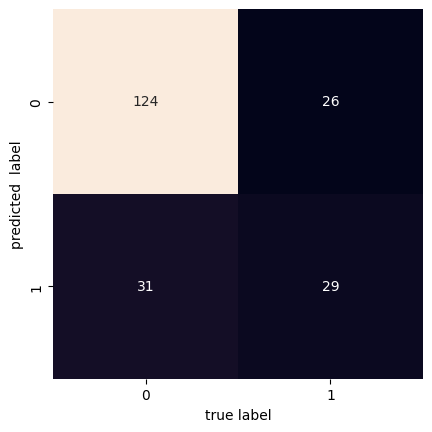

In [26]:
# Visualize the confusion matrix of Decision Tree
mat = confusion_matrix (y_test, pred_tree)
sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar= False)
plt.xlabel('true label')
plt.ylabel('predicted  label')

<Axes: >

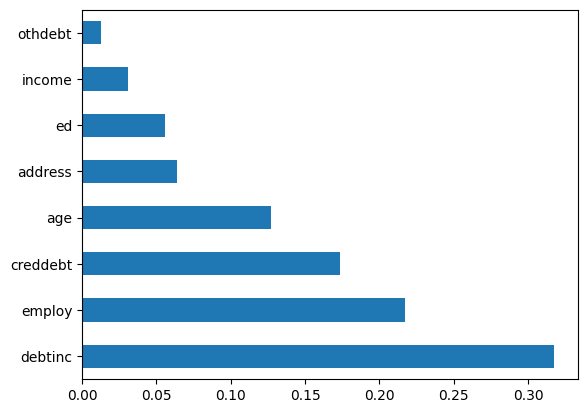

In [27]:
# signifikan faktor dari model tersebut yang menggambarkan nasabah gagal bayar atau tidak
feat_importances = pd.Series(model_tree.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')

## Pemodelan Menggunakan Random Forest


In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [29]:
# Membuat objek algoritma Random Forest klasifikasi
clf_rf = RandomForestClassifier(n_estimators=200, max_depth=6)

# Memodelkan data menggunakan algoritma Decision Tree
model_rf = clf_rf.fit(x_train,y_train)

# Melakukan predict pada data test
pred_rf= model_rf.predict(x_test)

## Evaluasi Random Forest

In [30]:
print(classification_report(y_test, pred_rf))

              precision    recall  f1-score   support

         0.0       0.81      0.94      0.87       155
         1.0       0.69      0.36      0.48        55

    accuracy                           0.79       210
   macro avg       0.75      0.65      0.67       210
weighted avg       0.78      0.79      0.77       210



Text(113.9222222222222, 0.5, 'predicted  label')

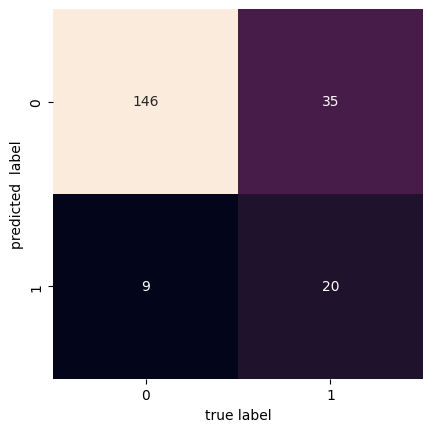

In [31]:
# Visualize the confusion matrix of Random Forest
mat = confusion_matrix (y_test, pred_rf)
sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar= False)
plt.xlabel('true label')
plt.ylabel('predicted  label')

<Axes: >

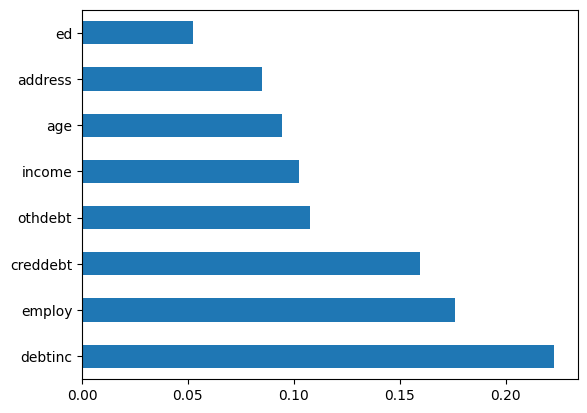

In [32]:
# signifikan faktor dari model Random Forest tersebut yang menggambarkan nasabah gagal bayar atau tidak
feat_importances = pd.Series(model_rf.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')

## Pemodelan Menggunakan XGBoost Classifier

In [33]:
from xgboost import XGBClassifier

In [34]:
# Membuat objek algoritma XGBOOST klasifikasi
clf_xg = XGBClassifier()

# Memodelkan data menggunakan algoritma Decision Tree
model_xg = clf_xg.fit(x_train,y_train)

# Melakukan predict pada data test
pred_xg= model_xg.predict(x_test)

## New Evaluasi clasification Report

In [35]:
print(classification_report(y_test, pred_xg))

              precision    recall  f1-score   support

         0.0       0.81      0.87      0.84       155
         1.0       0.55      0.44      0.48        55

    accuracy                           0.76       210
   macro avg       0.68      0.65      0.66       210
weighted avg       0.74      0.76      0.75       210



Text(113.9222222222222, 0.5, 'predicted  label')

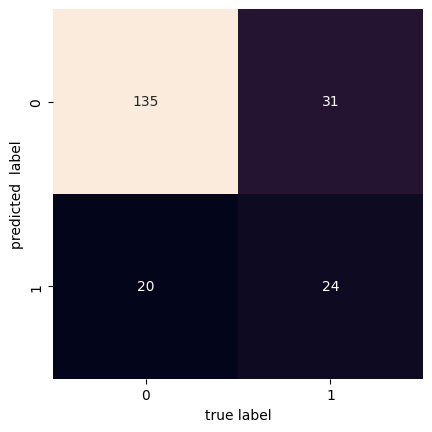

In [36]:
# Visualize the confusion matrix of XGBOOST
mat = confusion_matrix (y_test, pred_xg)
sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar= False)
plt.xlabel('true label')
plt.ylabel('predicted  label')

<Axes: >

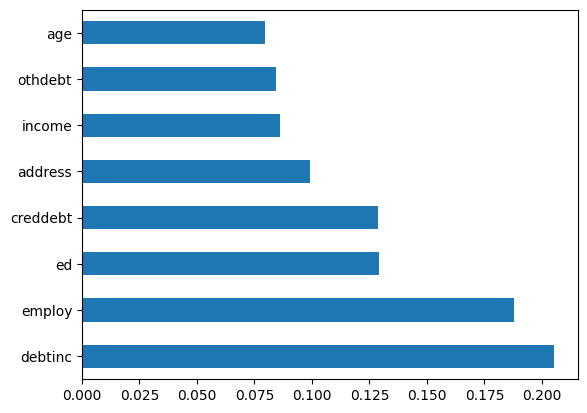

In [37]:
# signifikan faktor dari model XGBOOST tersebut yang menggambarkan nasabah gagal bayar atau tidak
feat_importances = pd.Series(model_xg.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')

## Pemodelan Menggunakan Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
# Membuat objek algoritma Logistic Regresion
clf_lg = LogisticRegression()

# Memodelkan data menggunakan algoritma Decision Tree
model_lg = clf_lg.fit(x_train,y_train)

# Melakukan predict pada data test
pred_lg= model_lg.predict(x_test)

## Evaluasi Logistic Regression

In [40]:
print(classification_report(y_test, pred_lg))

              precision    recall  f1-score   support

         0.0       0.82      0.95      0.88       155
         1.0       0.73      0.40      0.52        55

    accuracy                           0.80       210
   macro avg       0.77      0.67      0.70       210
weighted avg       0.79      0.80      0.78       210



Text(113.9222222222222, 0.5, 'predicted  label')

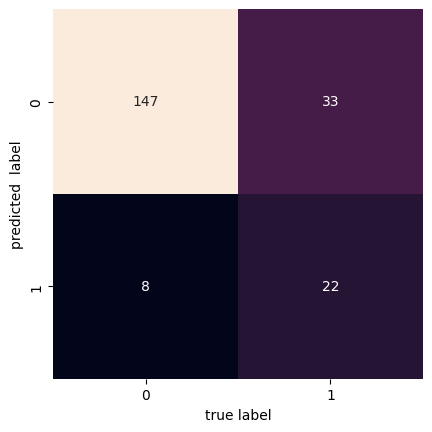

In [41]:
# Visualize the confusion matrix of Logistic Regression
mat = confusion_matrix (y_test, pred_lg)
sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar= False)
plt.xlabel('true label')
plt.ylabel('predicted  label')

## Pemodelan Menggunakan SVM

In [42]:
# Import SVM
from sklearn.svm import SVC

In [43]:
# Membuat objek algoritma SVM
clf_svm = SVC(kernel='linear', random_state=0)

# Memodelkan data menggunakan algoritma Decision Tree
model_svm = clf_svm.fit(x_train,y_train)

# Melakukan predict pada data test
pred_svm = model_svm.predict(x_test)

## Evaluasi Pemodelan SVM

In [44]:
print(classification_report(y_test, pred_svm))

              precision    recall  f1-score   support

         0.0       0.82      0.94      0.88       155
         1.0       0.73      0.44      0.55        55

    accuracy                           0.81       210
   macro avg       0.78      0.69      0.71       210
weighted avg       0.80      0.81      0.79       210



Text(113.9222222222222, 0.5, 'predicted  label')

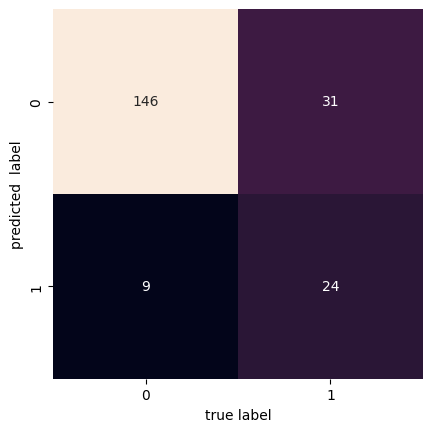

In [45]:
# Visualize the confusion matrix of SVM
mat = confusion_matrix (y_test, pred_svm)
sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar= False)
plt.xlabel('true label')
plt.ylabel('predicted  label')

## Implementasi Model

Model terbaik menggunakan SVM dengan accuracy 81% dengan pecision 82% dan recall 94%



In [48]:
# Load Data nasabah baru/calon nasabah yang mengajukan kredit
url_2 = '/content/drive/MyDrive/Colab Notebooks/MSIB/Data Mining/DataSource/credit_risk_newCust.csv'
df_load_data_2 = pd.read_csv(url_2)

# Data Frame
df_new_nasabah = pd.DataFrame(df_load_data_2)
df_new_nasabah.head()

,Unnamed: 0,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,700,36,1,16,13,32,10.9,0.544128,2.943872,NaN
1,701,50,1,6,27,21,12.9,1.316574,1.392426,NaN
2,702,40,1,9,9,33,17.0,4.880700,0.729300,NaN
3,703,31,1,5,7,23,2.0,0.046000,0.414000,NaN
4,704,29,1,4,0,24,7.8,0.866736,1.005264,NaN


In [50]:
# Input Variable untuk Predict

# #Target variabel (y)
# y = df['default'].astype('category')

x2 = df_new_nasabah[['age', 'ed', 'employ', 'address', 'income', 'debtinc', 'creddebt', 'othdebt']]

In [51]:
df_new_nasabah.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  150 non-null    int64  
 1   age         150 non-null    int64  
 2   ed          150 non-null    int64  
 3   employ      150 non-null    int64  
 4   address     150 non-null    int64  
 5   income      150 non-null    int64  
 6   debtinc     150 non-null    float64
 7   creddebt    150 non-null    float64
 8   othdebt     150 non-null    float64
 9   default     0 non-null      float64
dtypes: float64(4), int64(6)
memory usage: 11.8 KB


In [52]:
# Predict Menggunakan Model SVM

prediction_svm = model_svm.predict(x2)

In [53]:
prediction_svm

array([0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

## Membuat Object baru untuk preparig export hasil pemodelan data menggunakan data Baru

In [55]:
df_pred = pd.DataFrame({'prediction' : prediction_svm})
df_pred.head()

,prediction
0,0.0
1,0.0
2,1.0
3,0.0
4,0.0


In [59]:
df4 = x2
df4

,age,ed,employ,address,income,debtinc,creddebt,othdebt
0,36,1,16,13,32,10.9,0.544128,2.943872
1,50,1,6,27,21,12.9,1.316574,1.392426
2,40,1,9,9,33,17.0,4.880700,0.729300
3,31,1,5,7,23,2.0,0.046000,0.414000
4,29,1,4,0,24,7.8,0.866736,1.005264
...,...,...,...,...,...,...,...,...
145,34,1,12,15,32,2.7,0.239328,0.624672
146,32,2,12,11,116,5.7,4.026708,2.585292
147,48,1,13,11,38,10.8,0.722304,3.381696
148,35,2,1,11,24,7.8,0.417456,1.454544


In [63]:
# menggabungkan kolom dengan hasil predik

df_hasil_predict = pd.concat([df4 ,df_pred],sort=True, axis=1)

In [64]:
df_hasil_predict

,age,ed,employ,address,income,debtinc,creddebt,othdebt,prediction
0,36,1,16,13,32,10.9,0.544128,2.943872,0.0
1,50,1,6,27,21,12.9,1.316574,1.392426,0.0
2,40,1,9,9,33,17.0,4.880700,0.729300,1.0
3,31,1,5,7,23,2.0,0.046000,0.414000,0.0
4,29,1,4,0,24,7.8,0.866736,1.005264,0.0
...,...,...,...,...,...,...,...,...,...
145,34,1,12,15,32,2.7,0.239328,0.624672,0.0
146,32,2,12,11,116,5.7,4.026708,2.585292,0.0
147,48,1,13,11,38,10.8,0.722304,3.381696,0.0
148,35,2,1,11,24,7.8,0.417456,1.454544,0.0


## Berapa panyak Nasabah yang memiliki potensi gagalbayar?

In [65]:
df_hasil_predict['prediction'].value_counts()

0.0    127
1.0     23
Name: prediction, dtype: int64

dari hasil diatas, maka bank akan memutuskan ada sebanyak 127 calon nasabah yang diterima permohonan kreditnya dan 23 nasabah di tolak permohinan kartu kreditnya

In [66]:
#Exports to CSV
# Export as download if in colab
from google.colab import files

# Menyimpan File/ Export to local.computer outpout CSV File
df_hasil_predict.to_csv('df_hasil_predict.csv', sep=',')
files.download('df_hasil_predict.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>